In [1]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 58.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 83.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

# Applying Manual Classifier just by using Math
Using MNIST Dataset

In [3]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path
path.ls()

(#3) [Path('valid'),Path('labels.csv'),Path('train')]

In [4]:
#We are only training classifier which can classify 3 and 7
(path/'train').ls()

(#2) [Path('train/7'),Path('train/3')]

In [5]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('train/3/10.png'),Path('train/3/10000.png'),Path('train/3/10011.png'),Path('train/3/10031.png'),Path('train/3/10034.png'),Path('train/3/10042.png'),Path('train/3/10052.png'),Path('train/3/1007.png'),Path('train/3/10074.png'),Path('train/3/10091.png')...]

In [6]:
im3_path = threes[1]
im3 = Image.open(im3_path)
print("np:\n", array(im3)[4:10, 6:12])
print("tensor:\n", tensor(im3)[4:10, 6: 12])
im3

np:
 [[  0   0   0   0   0   0]
 [  0   0   0  29 150 195]
 [  0  48 166 224 253 253]
 [244 249 253 187  46  10]
 [253 253 230  48   0   0]
 [ 20  20  15   0   0   0]]
tensor:
 tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,  29, 150, 195],
        [  0,  48, 166, 224, 253, 253],
        [244, 249, 253, 187,  46,  10],
        [253, 253, 230,  48,   0,   0],
        [ 20,  20,  15,   0,   0,   0]], dtype=torch.uint8)


In [7]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15, 4:22])
df.style.set_properties(**{'font-size': '6pt'}).background_gradient('Blues')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


## How to identify if its a 3 or 7?
We can take average of all images in the folder for 3 and 7 individually; the resultant would be average or 'ideal 3' or 'ideal 7'. And later we will classify the digit is 3 or 7 by taking the difference to the ideal digits.

In [8]:
# Collecting all threes and sevens into one tensor
three_tensor = [tensor(Image.open(o)) for o in threes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
len(three_tensor), len(seven_tensor)

(6131, 6265)

<Axes: >

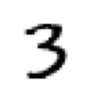

In [9]:
show_image(three_tensor[1])

In [10]:
# stacking all the tensors into single tensor and noremalising the values inside it
stacked_threes = torch.stack(three_tensor).float()/255
stacked_sevens = torch.stack(seven_tensor).float()/255
print(stacked_threes.shape, stacked_threes[1].shape)
stacked_threes[1]  # all values has been normalised

torch.Size([6131, 28, 28]) torch.Size([28, 28])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.0

In [11]:
torch.randn(1, 3).ndim

2

<Axes: >

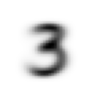

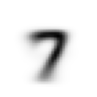

In [12]:
# calc mean of all tensors
mean3 = stacked_threes.mean(0)
mean7 = stacked_sevens.mean(0)
show_image(mean3)
show_image(mean7)

Absolute white and absolute black are the regions where all images agree that the digit is 3 or 7.

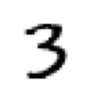

In [13]:
# Picking random 3
a_3 = stacked_threes[1]
show_image(a_3);

## Creating a loss function

In [14]:
# These would have low error since the digit we are trying to classify is 3
dist_3_abs = (a_3-mean3).abs().mean()
dist_3_sqrt = ((a_3-mean3)**2).mean().sqrt()
# These would have high error since we are comparing 3 to ideal7
dist_7_abs = (a_3-mean7).abs().mean()
dist_7_sqrt = ((a_3-mean7)**2).mean().sqrt()

print(dist_3_abs, dist_3_sqrt, dist_7_abs, dist_7_sqrt)

tensor(0.1114) tensor(0.2021) tensor(0.1586) tensor(0.3021)


In [15]:
# Same can be calculated with pytorch funtions
F.l1_loss(a_3.float(), mean7), F.mse_loss(a_3, mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

##  Calculating Metrics

In [16]:
valid_3_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls()])
valid_7_tens = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = valid_7_tens.float()/255
valid_3_tens.shape, valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

In [17]:
# Creating a mnist distance function which is nothing but l1_loss
def mnist_distance(a,b): return (a-b).abs().mean((-1, -2))
mnist_distance(a_3, mean3)

tensor(0.1114)

In [18]:
# Calculating distance for the entire validation set
# We are supplying [1010, 28, 28] shaped tensor to be calculated with [28 * 28]
# PyTorch automatically broadcasts the mean3 tensor to the same number of valid set
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1663, 0.1148, 0.1325,  ..., 0.1173, 0.1100, 0.1460]),
 torch.Size([1010]))

In [19]:
# Putting everything together
def is_3(x): return mnist_distance(x, mean3) < mnist_distance(x, mean7)

In [20]:
# Prediction
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

Above is true since difference between `ideal3` and `a_3` is lower than `ideal7` and `a_7`

In [21]:
# Validation set
is_3(valid_3_tens)

tensor([False,  True,  True,  ...,  True,  True,  True])

In [22]:
accuracy_3s =     is_3(valid_3_tens).float().mean()
accuracy_7s = 1 - is_3(valid_7_tens).float().mean()
accuracy_3s, accuracy_7s, (accuracy_3s + accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

# Stochastic Gradient Descent (SGD)
`x` is an image which is represented as vector ie, rows stacked up end to end. `w` is the weight vector for each pixel.

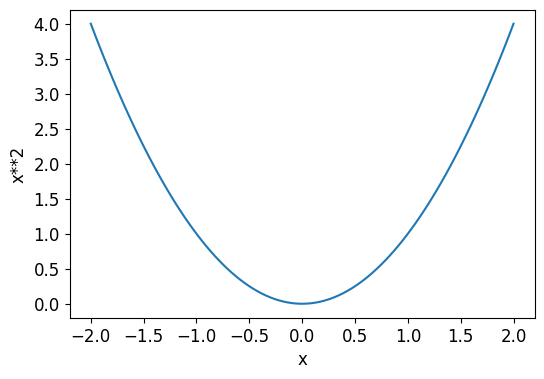

In [23]:
def f(x): return x**2
plot_function(f, 'x', 'x**2')

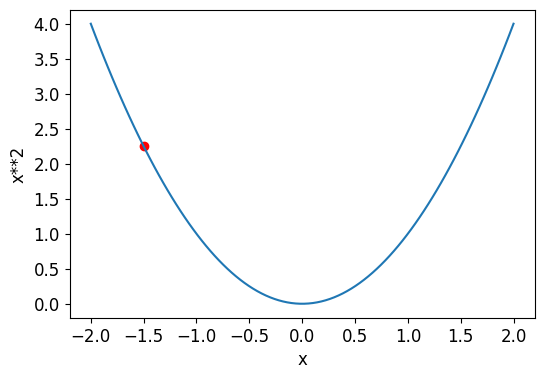

In [24]:
plot_function(f, 'x', 'x**2')
plt.scatter(-1.5, f(-1.5), color='red')

In [25]:
# pytorch tags this variable to automatically compute the derivative of newarly all function.
xt= tensor(3.).requires_grad_()
yt = f(xt)
yt

tensor(9., grad_fn=<PowBackward0>)

In [26]:
yt.backward()
xt.grad

tensor(6.)

In [27]:
# Calculating gradients for other tensor
xt = tensor([3., 4., 10.]).requires_grad_()
xt

tensor([ 3.,  4., 10.], requires_grad=True)

In [28]:
def f(x): return(x**2).sum()
yt = f(xt)
print(yt)
yt.backward()
xt.grad

tensor(125., grad_fn=<SumBackward0>)


tensor([ 6.,  8., 20.])

# End to end SGD example

In [29]:
time = torch.arange(0,20).float(); time

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

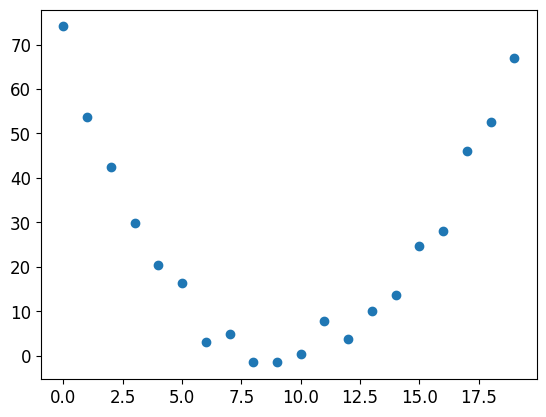

In [30]:
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
plt.scatter(time,speed);

In [31]:
# We are assuming that the speed of the roller coaster is in quadratic form
def f(t, params):
  a,b,c = params
  return a*(t**2) + b*t + c

In [32]:
# loss function
# For continous data the MSE is used commonly
def mse(preds, targets): return ((preds-targets)**2).mean()

In [33]:
# Step 1: Intializing the parameters
params = torch.randn(3).requires_grad_()
orig_params = params.clone()

In [34]:
# Step 2: Calculate the predictions
preds = f(time, params)

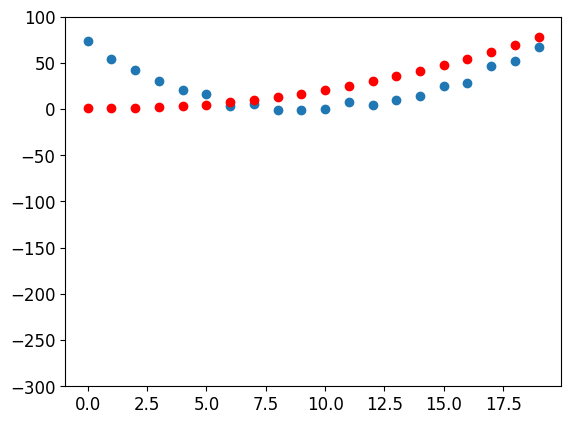

In [35]:
def show_preds(preds, ax=None):
  if ax is None: ax=plt.subplots()[1]
  ax.scatter(time, speed)
  ax.scatter(time, to_np(preds), color='red')
  ax.set_ylim(-300, 100)

show_preds(preds)

In [36]:
## STEP 3: Caclulate loss
loss = mse(preds, speed)
loss

tensor(817.4172, grad_fn=<MeanBackward0>)

In [37]:
## STEP 4: Calculate gradient
loss.backward()
params.grad

tensor([4.5169e+03, 2.9541e+02, 2.5931e+00])

In [38]:
## STEP 5: Stepping
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None

In [39]:
## STEP 6: Iterate
preds = f(time, params)
loss = mse(preds, speed)
loss

tensor(670.3992, grad_fn=<MeanBackward0>)

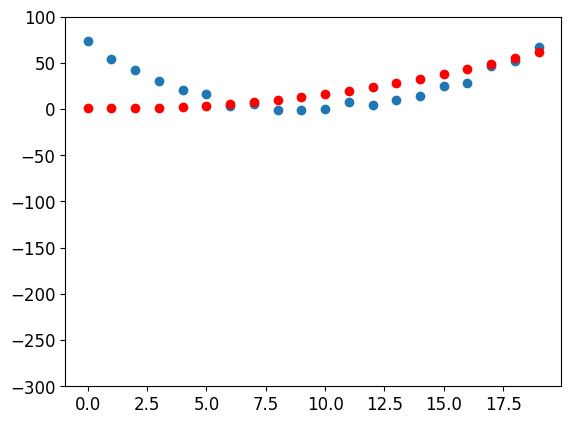

In [40]:
show_preds(preds)

In [41]:
def apply_step(params, prn = True):
  preds = f(time, params)
  loss = mse(preds, speed)
  loss.backward()
  params.data -= lr * params.grad
  params.grad = None
  if prn: print(loss.item())
  return preds

In [42]:
for i in range(10): apply_step(params)

670.3992309570312
642.5762939453125
637.3087158203125
636.3092041015625
636.117431640625
636.0784912109375
636.0684814453125
636.0640258789062
636.0604248046875
636.05712890625


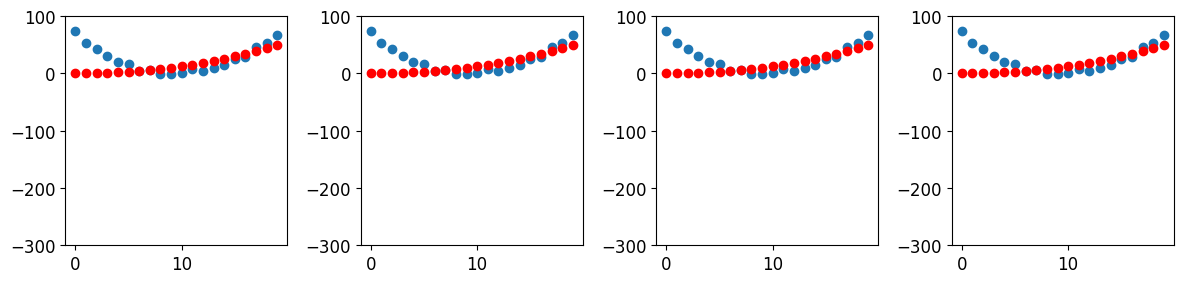

In [43]:
_, axs = plt.subplots(1, 4, figsize=(12, 3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

We have stopped after 10 epochs arbitarily.

# MNIST Loss Function
Converting our rank-3 tensor ie, stacked_3s and stacked_7s into rank-2 tensor; view is used to set the length of tensor; -1 states that tensor can be as big as it needs to fit all the data

In [46]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1,28 * 28)

In [49]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)

Dataset in PyTorch is required to return a tuple of (x,y) when indexed. We can use zip function which combines list

In [52]:
dset = list(zip(train_x, train_y))
x, y = dset[0]
x,y

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0

Repeating the same for validation set

In [57]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x, valid_y))

In [58]:
# Initailizing random parameters
def init_params(size, std=1.0): return (torch.randn(size)*std).requires_grad_()

In [63]:
weights = init_params(28*28, 1)
bias = init_params(1)
weights, bias

(tensor([ 4.7183e-01, -5.0351e-01,  1.8537e-01,  1.7064e+00,  2.2709e+00,  6.2684e-01,  1.6014e+00,  1.1966e+00,  4.3224e-01, -1.6974e+00, -8.7787e-01, -6.6627e-01,  3.4564e-01, -1.9724e-01,
         -1.5218e+00, -6.1098e-02,  8.3179e-01,  5.7187e-01,  8.9762e-02, -2.1488e+00, -2.6685e-01,  6.4505e-02, -1.4933e+00,  1.6295e+00, -1.5064e+00, -5.1665e-01,  2.0545e+00,  1.2938e+00,
          8.1700e-01, -1.0389e+00, -1.4859e+00,  1.4144e+00, -1.0722e+00,  3.3898e-01, -2.2175e-01,  2.1397e+00,  1.9970e-01,  8.8416e-01,  9.4998e-01, -1.0251e-01,  2.1756e-03, -2.8056e-01,
          1.0293e-01, -1.2885e+00, -7.2901e-01, -1.3368e+00,  2.8592e-01,  1.0035e+00,  3.1675e-01, -9.5203e-01, -6.3443e-01,  9.8095e-02, -2.2553e+00, -1.0051e+00,  2.7072e-01,  2.9641e-01,
         -3.0675e-01, -3.0783e-01, -7.7930e-01,  1.3531e+00,  9.0894e-01, -1.2521e+00,  5.0658e-01, -5.6990e-01,  3.3828e-01,  2.2548e-01, -5.5215e-01, -8.8587e-01, -8.2124e-01,  7.8169e-01,
          2.5165e+00, -8.6160e-02,  1.6284e+0

In [66]:
# Transversed Tensore
weights.T

tensor([ 4.7183e-01, -5.0351e-01,  1.8537e-01,  1.7064e+00,  2.2709e+00,  6.2684e-01,  1.6014e+00,  1.1966e+00,  4.3224e-01, -1.6974e+00, -8.7787e-01, -6.6627e-01,  3.4564e-01, -1.9724e-01,
        -1.5218e+00, -6.1098e-02,  8.3179e-01,  5.7187e-01,  8.9762e-02, -2.1488e+00, -2.6685e-01,  6.4505e-02, -1.4933e+00,  1.6295e+00, -1.5064e+00, -5.1665e-01,  2.0545e+00,  1.2938e+00,
         8.1700e-01, -1.0389e+00, -1.4859e+00,  1.4144e+00, -1.0722e+00,  3.3898e-01, -2.2175e-01,  2.1397e+00,  1.9970e-01,  8.8416e-01,  9.4998e-01, -1.0251e-01,  2.1756e-03, -2.8056e-01,
         1.0293e-01, -1.2885e+00, -7.2901e-01, -1.3368e+00,  2.8592e-01,  1.0035e+00,  3.1675e-01, -9.5203e-01, -6.3443e-01,  9.8095e-02, -2.2553e+00, -1.0051e+00,  2.7072e-01,  2.9641e-01,
        -3.0675e-01, -3.0783e-01, -7.7930e-01,  1.3531e+00,  9.0894e-01, -1.2521e+00,  5.0658e-01, -5.6990e-01,  3.3828e-01,  2.2548e-01, -5.5215e-01, -8.8587e-01, -8.2124e-01,  7.8169e-01,
         2.5165e+00, -8.6160e-02,  1.6284e+00,  6.

## Neural Network
 In neural networks, the `w` in the rectified linear equation is called the weights, and the `b` is called the bias. Together, the weights and bias make up the parameters.

In [67]:
# Calculating a prediction for one image
(train_x[0] * weights.T).sum() + bias

tensor([19.7493], grad_fn=<AddBackward0>)

In [70]:
 def linear1(xb): return xb@weights + bias
 preds = linear1(train_x)
 preds

tensor([19.7493, 13.1136, 11.7122,  ..., -1.8279,  9.3236, -1.6019], grad_fn=<AddBackward0>)

#### Matrix Multiplication

The first image prediction is same to the one done before the matrix multiplication.
`batch@weights + bias` Important Fundamental Equation (linear function) for neural network and other is Activation funtion or non linear function

In [71]:
# Matching the prediction and actual observation; if they are same or not
corrects = (preds > 0.0).float() == train_y
corrects

tensor([[ True,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False,  True, False],
        [ True,  True,  True,  ..., False,  True, False],
        ...,
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True],
        [False, False, False,  ...,  True, False,  True]])

In [72]:
# Taking mean of this would give the ACCURACY
corrects.float().mean().item()

0.49613240361213684

## Manual Modification of weight
Checking if there's any change after modifying the weight

In [75]:
# Modifing the first weight ie, weight assigned to the first pixel
weights[0]

tensor(0.0005, grad_fn=<SelectBackward0>)

In [73]:
with torch.no_grad(): weights[0] *=0.001

In [74]:
preds = linear1(train_x)
((preds>0.0).float() == train_y).float().mean().item()

0.49613240361213684

## Search for loss function
To modify our weights we need gradients; which represent instantaneous change for loss function (in case of neural network).
We can use accuracy as our loss function; but there is a technical issue which causes our gradient to be flat for almost whole prediction and infinity at the meeting.

Since our prediction's gradient didn't improve our model's performance (ACCURACY), the gradient